In [25]:
## IMPORTS
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
housing = fetch_california_housing()

In [27]:
## splitting the housing into train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [28]:
## splitting X_train_full and y_train_full into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [29]:
## checking some rows of the independent features
import pandas as pd
pd.DataFrame(X_train, columns=housing.feature_names).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5606,30.0,4.851695,1.108051,1272.0,2.694915,32.84,-117.18
1,4.6635,35.0,5.193333,0.953333,371.0,2.473333,34.25,-118.27
2,3.2202,24.0,4.400000,1.077519,2151.0,3.334884,34.11,-117.92
3,2.1757,42.0,4.181053,0.993684,1472.0,3.098947,32.74,-117.09
4,3.0450,26.0,4.443640,1.072389,3596.0,3.718718,33.78,-117.91


In [30]:
## checking some rows of the dependent feature
pd.DataFrame(y_train, columns=housing.target_names).head()

,MedHouseVal
0,1.651
1,2.301
2,1.262
3,1.101
4,1.840


In [31]:
## standard scaling the feature coloumns 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

##### Using sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classification. The main differences are the fact that the output has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

In [32]:
from tensorflow import keras

In [34]:
## creating a model
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [37]:
## compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

In [38]:
## fitting the model onto the training data
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.9880 - val_loss: 0.5444
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5138 - val_loss: 0.5160
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4931 - val_loss: 0.4633
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4696 - val_loss: 0.4519
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4549 - val_loss: 0.4441
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4635 - val_loss: 0.4325
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4418 - val_loss: 0.4084
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4216 - val_loss: 0.3973
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4140 - val_loss: 0.3830
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4202 - val_loss: 0.3786

In [42]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,val_loss
0,0.988017,0.544366
1,0.513807,0.515970
2,0.493095,0.463254
3,0.469559,0.451944
4,0.454921,0.444059


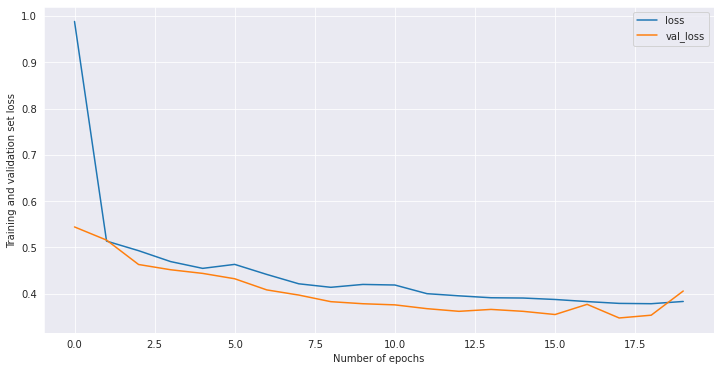

In [44]:
## plotting the loss of the model
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
history_df.plot(figsize=(12,6))
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Training and validation set loss')
plt.show();

In [45]:
## now validation the model on the test set
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.4134


0.413357675075531

In [46]:
## since we don't have any new data to predict let's get some of the rows from the test set and make the prediction for them
X_new = X_test[3:10]
y_pred = model.predict(X_new)